In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [25]:
def show(img, title="", cmap='gray', size=8):
    plt.figure(figsize=(size, size))
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [26]:
MIN_LINE_LENGTH = 400
MAX_LINE_GAP = 30
RESIZE_WIDTH = 2000

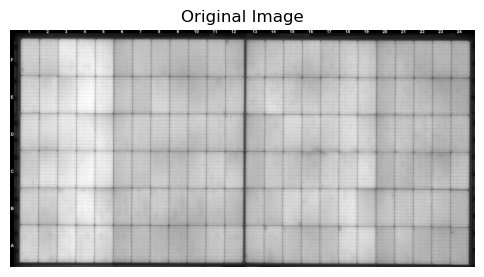

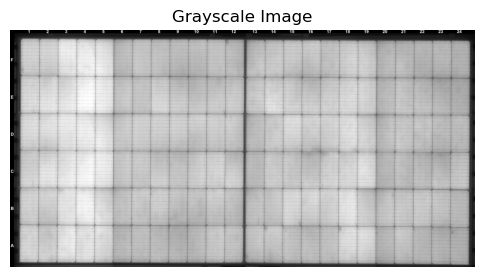

In [27]:
img_path = r"D:\PROGRAMMING\Internships_assignments\ResearchInternIITMandi\Full_modules_datasets\Full modules datasets\18.11.2024\ok\WS11249040878571.jpg"
orig = cv2.imread(img_path)
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

show(orig, "Original Image", size=6)
show(gray, "Grayscale Image", size=6)


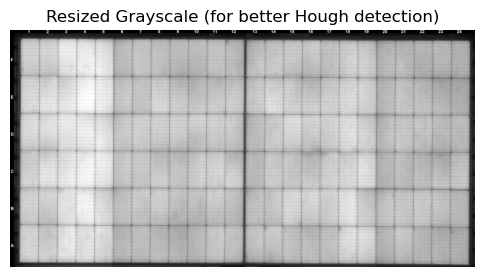

In [28]:
scale = RESIZE_WIDTH / orig.shape[1]
resized = cv2.resize(gray, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

show(resized, "Resized Grayscale (for better Hough detection)", size=6)

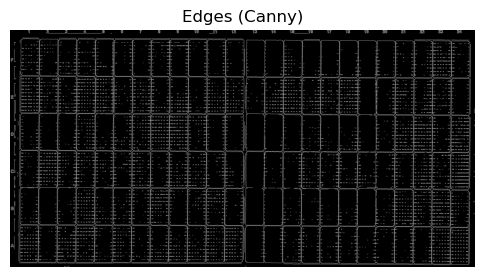

In [33]:
edges = cv2.Canny(resized, 90, 120)

show(edges, "Edges (Canny)", size=6)

In [34]:
lines = cv2.HoughLinesP(
    edges, 1, np.pi / 180, threshold=300,
    minLineLength=MIN_LINE_LENGTH,
    maxLineGap=MAX_LINE_GAP
)

In [35]:
v_lines = []
h_lines = []

for ln in lines:
    x1, y1, x2, y2 = ln[0]

    if abs(x1 - x2) < 10:
        v_lines.append(int(x1 / scale))
    elif abs(y1 - y2) < 10:
        h_lines.append(int(y1 / scale))

v_lines = sorted(list(set(v_lines)))
h_lines = sorted(list(set(h_lines)))

print("Vertical lines:", v_lines)
print("Horizontal lines:", h_lines)


Vertical lines: [48, 1199, 1201, 1207, 1209, 1644, 2078, 4053]
Horizontal lines: [111, 122, 548, 990, 2287, 2289, 2642, 2647, 2683, 2715]


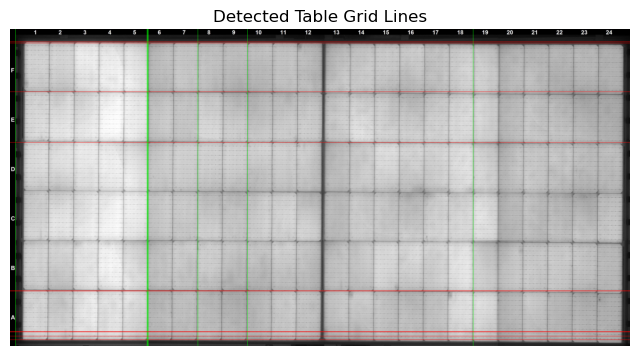

In [36]:
vis = orig.copy()

# draw vertical lines
for x in v_lines:
    cv2.line(vis, (x, 0), (x, vis.shape[0]), (0, 255, 0), 2)

# draw horizontal lines
for y in h_lines:
    cv2.line(vis, (0, y), (vis.shape[1], y), (0, 0, 255), 2)

show(vis, "Detected Table Grid Lines", size=8)
